In [ ]:
! pip install -U langgraph langchain_core langchain-google-genai

In [104]:
# Imported All the Neccessary Libraries
from langchain_google_genai import ChatGoogleGenerativeAI
from langgraph.graph import StateGraph,START,END
from langgraph.graph.state import CompiledStateGraph
import os
from dotenv import load_dotenv
from IPython.display import Image,display
from langgraph.graph.message import MessagesState


In [91]:

# Loading all the Environment Variables
load_dotenv()

google_api = os.getenv("GEMINI_API_KEY")

llm : ChatGoogleGenerativeAI = ChatGoogleGenerativeAI(model='gemini-1.5-flash',api_key=google_api)

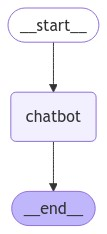

In [ ]:
class State(MessagesState):
    pass

def chatbot(state:State):
    return {"messages" : llm.invoke(state["messages"])}


workflow:StateGraph = StateGraph(State)
workflow.add_node("chatbot",chatbot)
workflow.add_edge(START,"chatbot")
workflow.add_edge("chatbot",END)

graph:CompiledStateGraph = workflow.compile()
    

display(Image(graph.get_graph().draw_mermaid_png()))
    

In [ ]:
input_value = input("Enter your prompt")
messages = graph.invoke({"messages" : input_value})

for m in messages["messages"]:
    m.pretty_print()

================================ Human Message =================================

What is LangGraph ?
================================== Ai Message ==================================

LangGraph is a **knowledge graph** that focuses on **language-related information**. It's like a massive, interconnected database of facts about languages, their structure, and their usage. 

Here's a breakdown of its key features:

**What it contains:**

* **Languages:** Information about individual languages, including their names, families, geographic distributions, and speakers.
* **Linguistic features:** Data about language structures, such as phonology (sounds), morphology (word formation), syntax (sentence structure), and semantics (meaning).
* **Language relationships:** Connections between languages, including genetic relationships (family trees), contact relationships (influence), and typological relationships (shared features).
* **Language resources:** Links to external resources, such as dict